# Quantum secret sharing protocol through noisy channel with application in visual cryptography


In [23]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math
# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram


# 1. Circuit of secret information sharing with |S1⟩ = | + ++⟩ and |m⟩ = |110⟩

Dealer start by preparing the initial state |S1⟩ = | + ++⟩

In [24]:
n = 3
grover_circuit = QuantumCircuit(n)

In [25]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

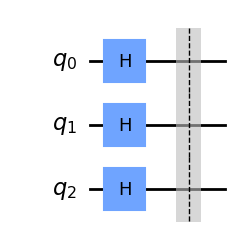

In [26]:
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.barrier()
grover_circuit.draw()

Dealer apply the operatros $U_{110},U_{S1},U_{110}$  

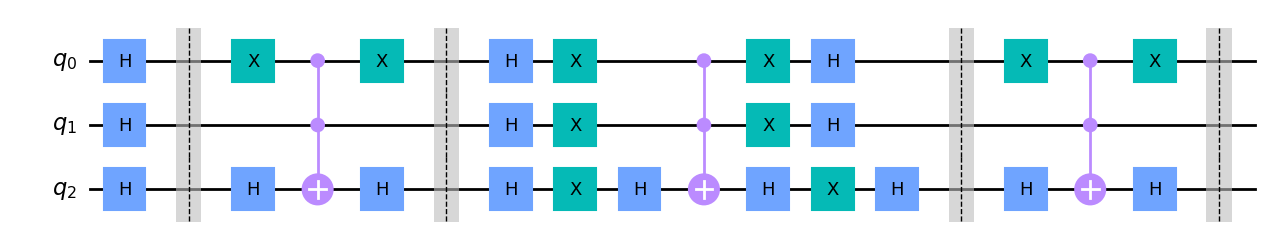

In [27]:
#qc = QuantumCircuit(3)
#oracle U_m, m=110

grover_circuit.x(0)
grover_circuit.h(2)
grover_circuit.mct(list(range(2)), 2)  # multi-controlled-toffoli
grover_circuit.h(2)
grover_circuit.x(0)
grover_circuit.barrier()
#diffuser(nqubits)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.x([0,1,2])
grover_circuit.h(2)
grover_circuit.mct(list(range(2)), 2)
grover_circuit.h(2)
grover_circuit.x([0,1,2])
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.barrier()
#oracle
grover_circuit.x(0)
grover_circuit.h(2)
grover_circuit.mct(list(range(2)), 2)  # multi-controlled-toffoli
grover_circuit.h(2)
grover_circuit.x(0)
grover_circuit.barrier()
grover_circuit.draw()

Participants apply the operator $U_{S_{1}}$

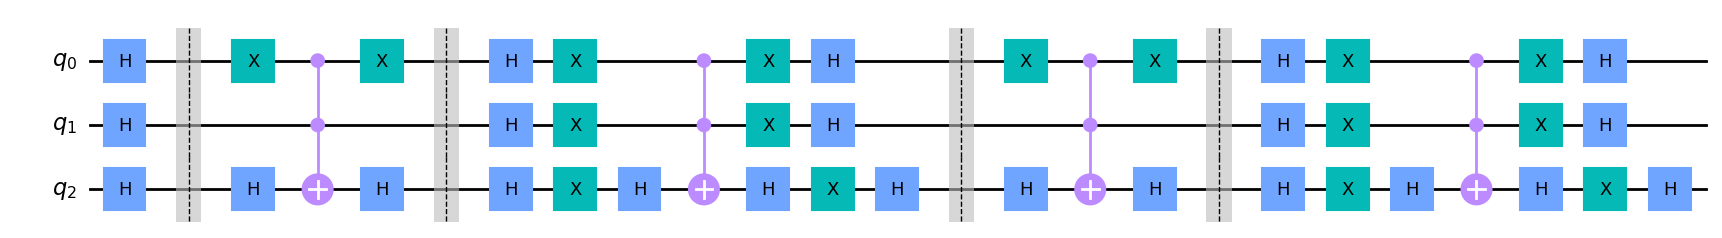

In [28]:
#diffuser(nqubits)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.x([0,1,2])
grover_circuit.h(2)
grover_circuit.mct(list(range(2)), 2)
grover_circuit.h(2)
grover_circuit.x([0,1,2])
grover_circuit = initialize_s(grover_circuit, [0,1,2])

grover_circuit.draw()


Let's run the circuit in simulation. First, we can verify that we have the correct statevector:

In [29]:
from qiskit import Aer, assemble
sv_sim = Aer.get_backend('statevector_simulator')
result = sv_sim.run(grover_circuit).result()
statevec = result.get_statevector()
from qiskit.visualization import array_to_latex
array_to_latex(statevec, prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

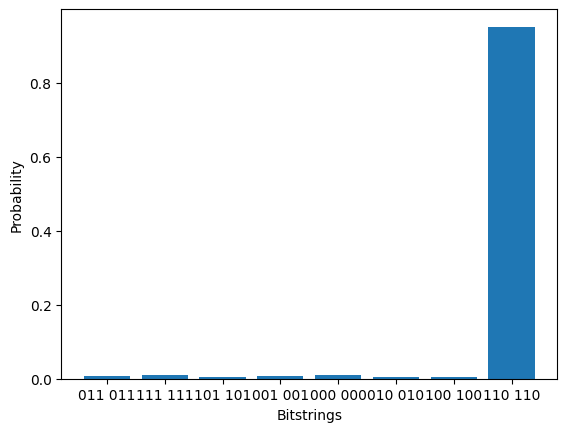

In [10]:
grover_circuit.measure_all()

qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(grover_circuit).result()
counts = result.get_counts()
total_shots = sum(counts.values())
probabilities = {state: count / total_shots for state, count in counts.items()}

plt.bar(probabilities.keys(), probabilities.values())
plt.xlabel('Bitstrings')
plt.ylabel('Probability')
plt.show()

As we can see, the algorithm discovers our marked state  $\lvert110\rangle$

# Circuit of eavesdropping checking with |S2⟩ = | + +−⟩ and |m⟩ = |000⟩


Dealer start by preparing the initial state |S1⟩ = | + +-⟩

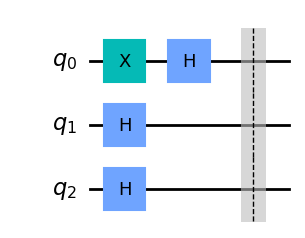

In [18]:
n = 3
grover_circuit = QuantumCircuit(n)
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc
grover_circuit.x(0)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.barrier()
grover_circuit.draw()

Dealer apply the operatros $U_{000}$

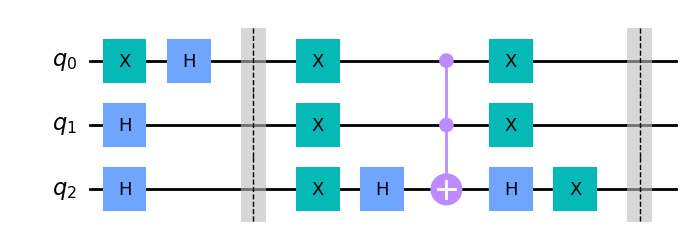

In [19]:
#qc = QuantumCircuit(3)
#oracle U_m, m=000
grover_circuit.x([0,1,2])
grover_circuit.h(2)
grover_circuit.mct(list(range(2)), 2)  # multi-controlled-toffoli
grover_circuit.h(2)
grover_circuit.x([0,1,2])
grover_circuit.barrier()
grover_circuit.draw()

Participants apply the operator $U_{S_{2}}$

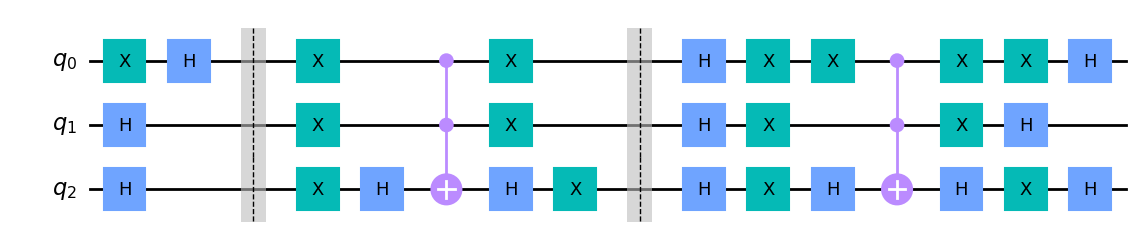

In [20]:
#diffuser(nqubits)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.x(0)
grover_circuit.x([0,1,2])
grover_circuit.h(2)
grover_circuit.mct(list(range(2)), 2)
grover_circuit.h(2)
grover_circuit.x([0,1,2])
grover_circuit.x(0)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.draw()

Let's run the circuit in simulation. First, we can verify that we have the correct statevector:

In [21]:
from qiskit import Aer, assemble
sv_sim = Aer.get_backend('statevector_simulator')
result = sv_sim.run(grover_circuit).result()
statevec = result.get_statevector()
from qiskit.visualization import array_to_latex
array_to_latex(statevec, prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

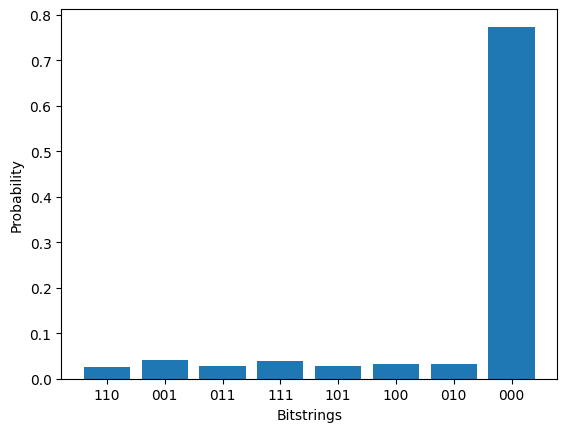

In [22]:
grover_circuit.measure_all()

qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(grover_circuit).result()
counts = result.get_counts()
total_shots = sum(counts.values())
probabilities = {state: count / total_shots for state, count in counts.items()}

plt.bar(probabilities.keys(), probabilities.values())
plt.xlabel('Bitstrings')
plt.ylabel('Probability')
plt.show()

As we can see, the algorithm discovers our marked state  $\lvert000\rangle$